<p style="text-align:left;">
    Foundations of Data Science 7COM1073
    <span style="float:right;">
        University of Hertfordshire
    </span>
</p> 

<!-- <h2>Assessment 1 – Data Classification (75 marks)</h2>  -->

<div align="center">
  <h2>Assessment 1 – Data Classification (75 marks)</h2>
</div>
 
This assessment includes two parts and counts for 75% of the overall assessment for this module. 
The first part is 20 marks and should be submitted by noon on 22/11/2019 and the second one is 55 marks and should be handed by 20/12/2019.

The programming language you should use to finish this assessment is Python (in version 3 and above). In particular, you can use functions from the following packages: Numpy, Pandas, Matplotlib, Seaborn and Sklearn.  

All Python skills needed to do this assessment have been covered in the practical sessions –practical notes are available on Canvas. 

The information of the dataset which you will work with can be viewed in the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/  
<sub><i> Note that you should work on the red wine dataset (winequality-red.csv) only, which can be downloaded from ‘Data Folder’ in the link given above. </i>





<div align="center">
  <h3>Part one (20 marks)</h3>
</div>

***

### **Task 1:** Data pre-processing and data exploration (15 marks) 

- a. Use Pandas to load data  
- b. Merge all the data with “quality” labels between 6-10 into Class 1 and similarly form Class 2 for the data with “quality” labels between 1-5.
- c. Report the number of features and number of rows in each class 
- d. Choose an attribute and generate a boxplot for the two pre-defined classes. 
- e. Show one scatter plot, that is, one feature against another feature. It is your choice to show which two features you want to use. 

***

##### *a. Use Pandas to load data*

In [1]:
import pandas as pd
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter= ";")
#wine = pd.read_csv("winequality-red.csv")
print("Shape of the red wine dataset is :",wine.shape)
wine.head()
#wine.dtypes

Shape of the red wine dataset is : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### *b. Merge all the data with “quality” labels between 6-10 into Class 1 and similarly form Class 2 for the data with “quality” labels between 1-5.*


In [2]:
Class1 = wine.loc[(wine['quality'] >=6) & (wine['quality'] <=10)]
Class2 = wine.loc[(wine['quality'] >=0) & (wine['quality'] <=5)]
print("Number of observations in Class 1 are",Class1['quality'].count(),"and Number of observations in Class 2 are",Class2['quality'].count())

wine ["quality"] = wine["quality"].replace([6,7,8,9,10],'Class 1')
wine ["quality"] = wine["quality"].replace([1,2,3,4,5],'Class 2')

Number of observations in Class 1 are 855 and Number of observations in Class 2 are 744


##### *c. Report the number of features and number of rows in each class*

In [3]:
#c Report the number of features and number of rows in each class
print("Class 1 consists of",Class1.shape[0],"rows and",Class1.shape[1],"features")
print("Class 2 consists of",Class2.shape[0],"rows and",Class2.shape[1],"features")

Class 1 consists of 855 rows and 12 features
Class 2 consists of 744 rows and 12 features


##### *d. Choose an attribute and generate a boxplot for the two pre-defined classes*

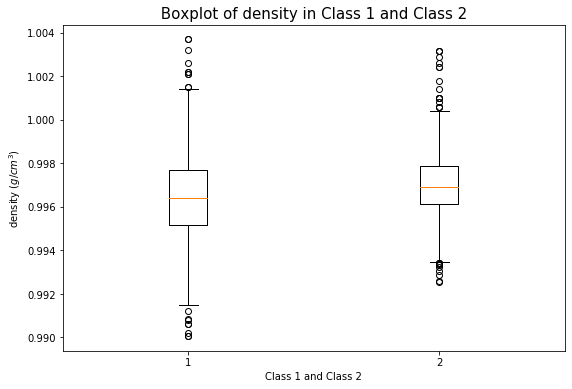

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
   
data_to_plot = [Class1['density'], Class2['density']]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
plt.title(' Boxplot of density in Class 1 and Class 2 ',fontsize=15)
plt.xlabel("Class 1 and Class 2")
plt.ylabel("density "r'$( g/cm^3 )$')


fig.savefig('Boxplot of density in Class 1 and Class 2.png', bbox_inches='tight')

##### *e. Show one scatter plot, that is, one feature against another feature. It is your choice to show which two features you want to use.*

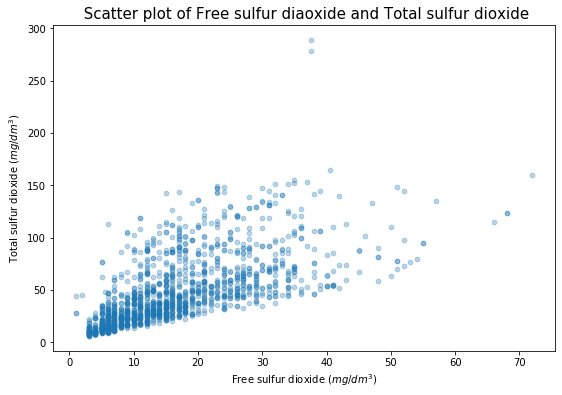

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
area = np.pi*7

plt.scatter(wine['free sulfur dioxide'], wine['total sulfur dioxide'], s = area , alpha=0.3)
plt.title(' Scatter plot of Free sulfur diaoxide and Total sulfur dioxide',size = 15)
plt.xlabel("Free sulfur dioxide "r'$(mg/dm^3)$')
plt.ylabel("Total sulfur dioxide "r'$(mg/dm^3)$')
plt.show()

fig.savefig('Scatter plot of Free sulfur diaoxide and Total sulfur dioxide.png', bbox_inches='tight')

***

### **Task 2:**  Computing probabilities using Python code for the given red wine dataset (5 marks)  

- f. Prior probability:  
        i. What is the probability of a wine classified as Class 1 (P(Class 1))? 
       ii. What is the probability of a wine classified as Class 2 (P(Class 2))? 
- g. Conditional probability:
        i. What is the probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1))?
- h. Posterior probability: 
        i.  What is the probability of a wine classified as Class 1 when it has a pH value greater than 3.6?



##### <i>f. <u>Prior probability:</u> </i>
   + *i. What is the probability of a wine classified as Class 1 (P(Class 1))?*
   + *ii. What is the probability of a wine classified as Class 2 (P(Class 2))?*

In [6]:
# f. Prior probablitiy
import numpy as np
import sympy as sp
from sympy import FiniteSet

SS = SampleSpace = wine['quality'].count()
C1 = Class1['quality'].count()
C2 = Class2['quality'].count()

PC1 = C1/SampleSpace
PC2 = C2/SampleSpace

# i. What is the probability of a wine classified as Class 1 (P(Class 1))?
print("The probability of a wine classified as Class 1 =",PC1)

# ii. What is the probability of a wine classified as Class 2 (P(Class 2))?
print("The probability of a wine classified as Class 2 =",PC2)

The probability of a wine classified as Class 1 = 0.5347091932457786
The probability of a wine classified as Class 2 = 0.4652908067542214


<sup><i><b><u>Note:</b></u> Number of observations in: SampleSpace = 1599, Class1 = 855, Class2 = 744
    
\begin{equation*}
P(Class 1) = \frac{855}{1599} = 0.5347091932457786 \\ P(Class 2) = \frac{744}{1599} = 0.4652908067542214
\end{equation*}

##### <i>g. <u>Conditional probability:</u></i>
+ *i. What is the probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1))?*

In [7]:
#g. Conditional Probablity
#i. What is the probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1))?
import pandas as pd 

DataFrame = pd.DataFrame(Class1)
subsetDataFrame = DataFrame[DataFrame['pH'] > 3.6]

# P_P = P(pH>3.6 and Class 1) =>  probability of a wine having a pH value greater than 3.6 and are classified as Class 1
# P_C = P(Class1) => probabilty of a wine being classified as Class 1
# P_probability => (P(pH>3.6|Class 1))

P_P = subsetDataFrame['pH'].count()
print("The count of values which have pH > 3.6 and are classified as Class 1 :", P_P)
P_P = P_P/SampleSpace
P_C = Class1['pH'].count()
P_C = P_C/SampleSpace
P_probability = (P_P / P_C)

print("\nThe probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1)) :\n",P_probability)


The count of values which have pH > 3.6 and are classified as Class 1 : 25

The probability of a wine having a pH value greater than 3.6 given it is classified as Class 1 (P(pH>3.6|Class 1)) :
 0.029239766081871343


<sup><i><b><u>Note:</b></u> Number of observations in: SampleSpace = 1599, Class1 = 855, Class2 = 744
    
\begin{equation*}
                Conditional\;Probability: P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation*}

$$ P(pH>3.6|Class\;1) = \frac{\frac{25}{1599}}{\frac{855}{1599}} = \frac{25}{855} = 0.029239766081871343 $$

\begin{equation*}
Result : P(pH>3.6|Class\;1) = 0.029239766081871343
\end{equation*}

##### <i>h. <u>Posterior probability:</u> </i>
+ *i.  What is the probability of a wine classified as Class 1 when it has a pH value greater than 3.6 (P(Class 1|pH>3.6))?*

In [8]:
#h. Posterior probability:
#i.  What is the probability of a wine classified as Class 1 when it has a pH value greater than 3.6 P(Class 1|pH>3.6)?
import pandas as pd 

DataFrame = pd.DataFrame(wine)
subsetDataFrame = DataFrame[DataFrame['pH'] > 3.6]

# P_P = P(pH>3.6) =>  probability of a wine having a pH value greater than 3.6
# P_C = P(Class1) => probabilty of a wine being classified as Class 1
# P_probability => (P(Class 1|pH>3.6))

P_P = subsetDataFrame['pH'].count()
print("The count of values which have pH > 3.6 :", P_P)
P_P = P_P/SampleSpace
P_C = Class1['pH'].count()
P_C = P_C/SampleSpace
P_probability = ((P_probability)*P_C)/P_P

print("\nThe probability of a wine classified as Class 1 when it has a pH value greater than 3.6 (P(Class 1|pH>3.6)) :\n",P_probability)


The count of values which have pH > 3.6 : 48

The probability of a wine classified as Class 1 when it has a pH value greater than 3.6 (P(Class 1|pH>3.6)) :
 0.5208333333333333


<sup><i><b><u>Note:</b></u> Number of observations in: SampleSpace = 1599, Class1 = 855, Class2 = 744, pH>3.6 = 48, pH>3.6∩Class1 = 25

\begin{equation*}
                Posterior\;Probability: P(B|A) = \frac{P(A|B)P(B)}{P(A)}
\end{equation*}

\begin{equation*}
P(Class\;1|pH>3.6) = \frac{P(pH>3.6|Class\;1)P(Class\;1)}{P(pH>3.6)}
\end{equation*}

\begin{equation*}
P(Class\;1|pH>3.6) = \frac{\frac{25}{~~855~~}\times{\frac{~~855~~}{~~1599~~}}}{\frac{48}{~~1599~~}} = \frac{25}{48} = 0.5208333333333333
\end{equation*}

\begin{equation*}
Result : (Class\;1|pH>3.6) = 0.5208333333333333
\end{equation*}

****